# Exploration Notebook - Datasets

Exploration notebook to choose initial datasets.

In [3]:
# import img2dataset # pyarrow bug python 3.11
# 53s first run, 0s second run
import fiftyone as fo
import fiftyone.zoo as foz


ModuleNotFoundError: No module named 'fiftyone'

In [4]:
dataset = foz.load_zoo_dataset("quickstart") # https://colab.research.google.com/github/voxel51/fiftyone-examples/blob/master/examples/quickstart.ipynb
dataset

NameError: name 'foz' is not defined

In [4]:
session = fo.launch_app(dataset)

In [5]:
from img2dataset import download# pyarrow bug python 3.11 - conda install 'pyarrow>=6.0.1,<8' as in requirements.txt of img2dataset github repo fixed it. 
# 31s first run, 0s second run


In [6]:
import shutil
import os 

In [7]:
# output_dir = os.path.abspath("../data/out")
# if os.path.exists(output_dir):
#     shutil.rmtree(output_dir)

# download(
#     processes_count=1,
#     thread_count=32,
#     url_list="../data/in",
#     image_size=256,
#     output_folder=output_dir,
#     output_format="files",
#     input_format="json",
#     url_col="url",
#     caption_col="caption",
#     enable_wandb=False,
#     number_sample_per_shard=10000,
#     distributor="multiprocessing",
#     save_additional_columns=["id"],
# )

In [8]:
    # https://github.com/rom1504/img2dataset/blob/main/img2dataset/main.py : ...
# if params["save_additional_columns"] is not None:
    #     save_additional_columns_set = set(params["save_additional_columns"])

    #     forbidden_columns = set(
    #         [
    #             "key",
    #             "caption",
    #             "url",
    #             "width",
    #             "height",
    #             "original_width",
    #             "original_height",
    #             "status",
    #             "error_message",
    #             "exif",
    #             "md5",
    #             "sha256",
    #             "sha512",
    #         ]
    #     )
    #     intersection = save_additional_columns_set.intersection(forbidden_columns)
    #     if intersection:
    #         raise ValueError(
    #             f"You cannot use in save_additional_columns the following columns: {intersection}."
    #             + "img2dataset reserves these columns for its own use. Please remove them from save_additional_columns."
    #         )

In [9]:
import pandas as pd

In [10]:
df = pd.read_json("../data/in/clipsubset.json")
df

,caption,url,id,similarity
0,Milky Way Border fabric by animotaxis on Spoon...,http://s3.amazonaws.com/spoonflower/public/des...,357452471,0.949364
1,yolları : Colorful space background with nebul...,https://vidcdn.123rf.com/450nwm/alila/alila120...,357452313,0.914966
2,Another Starscape,https://s1.piq.land/2013/05/01/UxXDi2uNcl2k5pY...,286780602,0.912202
3,Reminisce - Ultraviolet Collection - 12 x 12 D...,https://www.scrapbook.com/products/cache/SBC_r...,357452240,0.911739
4,Design-A-Room Sky Background,http://s7.orientaltrading.com/is/image/Orienta...,349508390,0.910851
5,Falling Snow. Merry Christmas Background with ...,https://t2.ftcdn.net/jpg/00/74/47/63/240_F_744...,265482157,0.910811
6,Starry night seamless pattern Stock Vector - 1...,https://us.123rf.com/450wm/volyk/volyk1303/vol...,349507873,0.904492
7,"Starry night with moon, vector illustration",https://t1.ftcdn.net/jpg/00/67/83/44/240_F_678...,136846253,0.904374
8,Arthouse Fantasia Behang 260008 Diamond Galaxy...,https://cdn.myonlinestore.eu/93d313eb-6be1-11e...,151633055,0.904343
9,Holiday background with shiny stars in the dar...,https://t1.ftcdn.net/jpg/00/61/69/38/160_F_616...,349506644,0.903785


In [11]:
df.to_csv("../data/in/clipsubset.csv", index=False)

In [12]:
# 
# ValueError: Expected object or value
#
# download(
#     #processes_count=1,
#     #thread_count=32,
#     url_list="../data/in/clipsubset.csv",
#     input_format="json",
#     url_col="url",
#     #caption_col="caption",
#     number_sample_per_shard=10,
#     oom_shard_count=1,
    
# )

Starting the downloading of this file
Sharding file number 1 of 1 called /Users/jacopoferro/Documents/CompPhoto/spacewarp/data/in/clipsubset.csv


0it [00:00, ?it/s]


ValueError: Expected object or value

In [14]:
# let's dumb it down even more then.
!echo 'https://placekitten.com/200/305' >> myimglist.txt
!echo 'https://placekitten.com/200/304' >> myimglist.txt
!echo 'https://placekitten.com/200/303' >> myimglist.txt

In [15]:
!img2dataset --url_list=myimglist.txt --output_folder=output_folder --thread_count=64 --image_size=256

Starting the downloading of this file
Sharding file number 1 of 1 called /Users/jacopoferro/Documents/CompPhoto/spacewarp/notebooks/myimglist.txt
0it [00:00, ?it/s]File sharded in 1 shards
1it [00:04,  4.24s/it]
worker  - success: 1.000 - failed to download: 0.000 - failed to resize: 0.000 - images per sec: 3 - count: 6
total   - success: 1.000 - failed to download: 0.000 - failed to resize: 0.000 - images per sec: 3 - count: 6


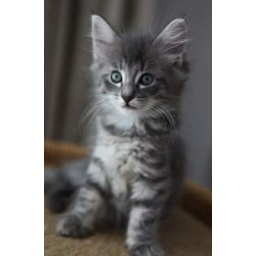

In [17]:
from IPython.display import Image
Image(filename='output_folder/00000/000000000.jpg')

In [18]:
df = pd.read_csv("../data/in/clipsubset.csv")
df

,caption,url,id,similarity
0,Milky Way Border fabric by animotaxis on Spoon...,http://s3.amazonaws.com/spoonflower/public/des...,357452471,0.949364
1,yolları : Colorful space background with nebul...,https://vidcdn.123rf.com/450nwm/alila/alila120...,357452313,0.914966
2,Another Starscape,https://s1.piq.land/2013/05/01/UxXDi2uNcl2k5pY...,286780602,0.912202
3,Reminisce - Ultraviolet Collection - 12 x 12 D...,https://www.scrapbook.com/products/cache/SBC_r...,357452240,0.911739
4,Design-A-Room Sky Background,http://s7.orientaltrading.com/is/image/Orienta...,349508390,0.910851
5,Falling Snow. Merry Christmas Background with ...,https://t2.ftcdn.net/jpg/00/74/47/63/240_F_744...,265482157,0.910811
6,Starry night seamless pattern Stock Vector - 1...,https://us.123rf.com/450wm/volyk/volyk1303/vol...,349507873,0.904492
7,"Starry night with moon, vector illustration",https://t1.ftcdn.net/jpg/00/67/83/44/240_F_678...,136846253,0.904374
8,Arthouse Fantasia Behang 260008 Diamond Galaxy...,https://cdn.myonlinestore.eu/93d313eb-6be1-11e...,151633055,0.904343
9,Holiday background with shiny stars in the dar...,https://t1.ftcdn.net/jpg/00/61/69/38/160_F_616...,349506644,0.903785


In [19]:
input_urls = os.path.abspath("../data/in/clipsubset.json")
input_format = "json"
url_col = "url"
caption_col = "caption"
output_dir = os.path.abspath("../data/out/clipsubset")
if os.path.exists(output_dir): # we delete the output dir entire tree if it already exists (to avoid conflicts with the existing files)
    shutil.rmtree(output_dir)

download(
    processes_count=4,
    thread_count=64,
    url_list=input_urls,
    input_format= input_format,
    url_col= url_col,
    caption_col= caption_col,
    image_size=256,
    output_folder=output_dir,
    output_format="files",
)

Starting the downloading of this file
Sharding file number 1 of 1 called /Users/jacopoferro/Documents/CompPhoto/spacewarp/data/in/clipsubset.json


0it [00:00, ?it/s]

File sharded in 1 shards


1it [00:13, 13.92s/it]


worker  - success: 0.875 - failed to download: 0.125 - failed to resize: 0.000 - images per sec: 2 - count: 16
total   - success: 0.875 - failed to download: 0.125 - failed to resize: 0.000 - images per sec: 2 - count: 16


Caption and Image:

yolları : Colorful space background with nebula and flying stars


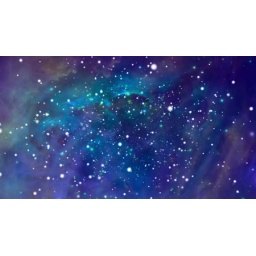

In [36]:
print("Caption and Image:\n")
print(open(file=output_dir+'/00000/000000001.txt').read())
Image(filename=output_dir+'/00000/000000001.jpg')

--- 

---

In [1]:
import os 
import shutil
from img2dataset import download

# now the real thing, unsplash-research-dataset 25k, photos + ai_generated captions
input_urls = os.path.abspath("../data/in/unsplash-research-dataset-lite-latest/photos.tsv000")
input_format = "tsv"
url_col = "photo_image_url"
caption_col = "ai_description"
output_dir = os.path.abspath("../data/out/unplash-512")
if os.path.exists(output_dir): # we delete the output dir entire tree if it already exists (to avoid conflicts with the existing files)
    shutil.rmtree(output_dir)

download(
    processes_count=8,
    thread_count=256,
    url_list=input_urls,
    input_format= input_format,
    url_col= url_col,
    caption_col= caption_col,
    image_size=512,
    output_folder=output_dir,
    output_format="files",
    save_additional_columns=['photo_id'],
)

Starting the downloading of this file
Sharding file number 1 of 1 called /Users/jacopoferro/Documents/CompPhoto/spacewarp/data/in/unsplash-research-dataset-lite-latest/photos.tsv000


0it [00:00, ?it/s]

File sharded in 3 shards


1it [52:44, 3164.09s/it]

worker  - success: 0.070 - failed to download: 0.930 - failed to resize: 0.000 - images per sec: 2 - count: 5000
total   - success: 0.070 - failed to download: 0.930 - failed to resize: 0.000 - images per sec: 2 - count: 5000


1it [1:25:35, 5135.97s/it]


AttributeError: 'tuple' object has no attribute 'tb_frame'

Stopped after 85min, will retry from CLI + set timeout larger because original files are very big and 10s is not enough probably. Also default is incremental so we should not run the 'delete' folder tree thing if we want to keep it incremental.

The above is still our useful initial dataset! About 6600 files = 6600 / 3 photos = 2200 roughly. We can use this to start with.

I copied the unplash folder and saved it as 'lite'

Starting the downloading of this file
Sharding file number 1 of 1 called /Users/jacopoferro/Documents/CompPhoto/spacewarp/data/in/unsplash-research-dataset-lite-latest/photos.tsv000
0it [00:00, ?it/s]
File sharded in 3 shards
Downloading starting now, check your bandwidth speed (with bwm-ng)your cpu (with htop), and your disk usage (with iotop)!
1it [52:44, 3164.09s/it]
worker  - success: 0.070 - failed to download: 0.930 - failed to resize: 0.000 - images per sec: 2 - count: 5000
total   - success: 0.070 - failed to download: 0.930 - failed to resize: 0.000 - images per sec: 2 - count: 5000
1it [1:25:35, 5135.97s/it]